In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn import preprocessing

In [2]:
# Run this for testing

data = {
    'TITLE': [
        'The Matrix',
        'Titanic',
        'Inception',
        'The Godfather',
        'The Dark Knight',
        'Pulp Fiction',
        'Forrest Gump',
        'Fight Club',
        'The Shawshank Redemption',
        'Gladiator'
    ],
    'DESCRIPTION': [
        'A computer hacker learns about the true nature of his reality and his role in the war against its controllers.',
        'A young aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.',
        'A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.',
        'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.',
        'When the menace known as the Joker emerges from his mysterious past, he wreaks havoc and chaos on the people of Gotham.',
        'The lives of two mob hitmen, a boxer, a gangster\'s wife, and a pair of diner bandits intertwine in four tales of violence and redemption.',
        'The presidencies of Kennedy and Johnson, the events of Vietnam, Watergate, and other history unfold through the perspective of an Alabama man with an IQ of 75.',
        'An insomniac office worker and a devil-may-care soap maker form an underground fight club that evolves into something much, much more.',
        'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'A former Roman General sets out to exact vengeance against the corrupt emperor who murdered his family and sent him into slavery.'
    ],
    'GENRE': [
        'Sci-Fi',
        'Romance',
        'Action',
        'Crime',
        'Action',
        'Crime',
        'Drama',
        'Drama',
        'Drama',
        'Action'
    ]
}

df = pd.DataFrame(data)
df.head()

,TITLE,DESCRIPTION,GENRE
0,The Matrix,A computer hacker learns about the true nature...,Sci-Fi
1,Titanic,A young aristocrat falls in love with a kind b...,Romance
2,Inception,A thief who steals corporate secrets through t...,Action
3,The Godfather,The aging patriarch of an organized crime dyna...,Crime
4,The Dark Knight,When the menace known as the Joker emerges fro...,Action


In [ ]:
# DO NOT RUN THIS YET
df = pd.read_csv('dataset/movie_data.csv', index_col=0)
df.head()

In [ ]:
# DO NOT RUN THIS YET

df[['TITLE', 'YEAR']] = df['TITLE'].str.extract(r'^(.*)\((\d{4})\)$')
df = df[['TITLE', 'YEAR', 'GENRE', 'DESCRIPTION']]
df.dropna(inplace=True)
df['TITLE'] = df['TITLE'].str.replace('"', '')
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y').dt.year
df.reset_index(drop=True, inplace=True)
df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        10 non-null     object
 1   DESCRIPTION  10 non-null     object
 2   GENRE        10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


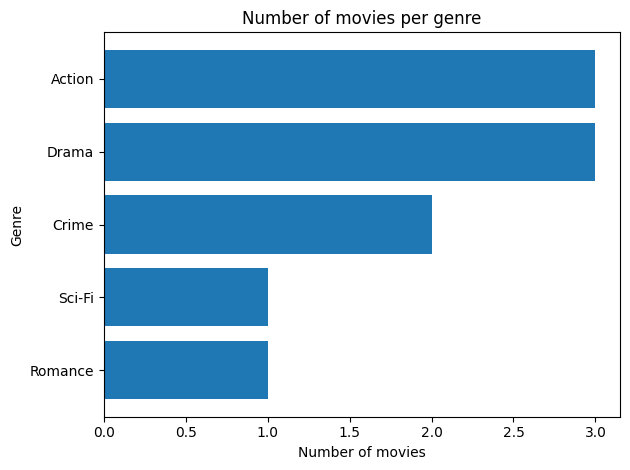

In [4]:
x_values = list(df['GENRE'].value_counts().index)
y_values = list(df['GENRE'].value_counts().values)

x_values.reverse()
y_values.reverse()

plt.barh(x_values, y_values)

plt.title('Number of movies per genre')
plt.xlabel('Number of movies')
plt.ylabel('Genre')

plt.tight_layout()

plt.show()

In [ ]:
# DO NOT RUN THIS YET

x_values = list(df['YEAR'].value_counts().index)
y_values = list(df['YEAR'].value_counts().values)

plt.bar(x_values, y_values)

plt.title('Number of movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

plt.tight_layout()

plt.show()

In [5]:
nlp = spacy.load('en_core_web_sm')

def preprocess_spacy(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_punct and not token.is_stop])

clean_text_spacy = df['DESCRIPTION'].apply(preprocess_spacy)
clean_text_spacy[0]

'computer hacker learn true nature reality role war controller'

In [6]:
nltk_lemmatizer = WordNetLemmatizer()
nltk_stopwords = stopwords.words('english')

def preprocess_nltk(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return ' '.join([nltk_lemmatizer.lemmatize(token) for token in tokens if token not in nltk_stopwords and (token.isalpha() or token.isdigit())])

clean_text_nltk = df['DESCRIPTION'].apply(preprocess_nltk)
clean_text_nltk[0]

'computer hacker learns true nature reality role war controller'

In [7]:
def preprocess_textblob(text):
    blob = TextBlob(text)
    blob = blob.lower()
    return ' '.join([word.lemmatize() for word in blob.words if word not in nltk_stopwords])

clean_text_blob = df['DESCRIPTION'].apply(preprocess_textblob)
clean_text_blob[0]

'computer hacker learns true nature reality role war controller'

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()
bow_vector = vectorizer.fit_transform(clean_text_nltk)

# Convert to array
print("Bag of Words (BoW) representation:")
print(bow_vector.toarray())
print("Feature names:")
print(vectorizer.get_feature_names_out())

Bag of Words (BoW) representation:
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Feature names:
['75' 'aboard' 'act' 'aging' 'alabama' 'aristocrat' 'artist' 'bandit'
 'bond' 'boxer' 'chaos' 'clandestine' 'club' 'common' 'computer' 'control'
 'controller' 'corporate' 'corrupt' 'crime' 'decency' 'diner' 'dynasty'
 'emerges' 'emperor' 'empire' 'event' 'eventual' 'evolves' 'exact' 'fall'
 'family' 'fight' 'finding' 'form' 'former' 'four' 'gangster' 'general'
 'given' 'gotham' 'hacker' 'havoc' 'history' 'hitman' 'idea' 'imprisoned'
 'insomniac' 'intertwine' 'inverse' 'iq' 'johnson' 'joker' 'kennedy'
 'kind' 'known' 'learns' 'life' 'love' 'luxurious' 'maker' 'man' 'men'
 'menace' 'mind' 'mob' 'much' 'murdered' 'mysterious' 'nature' 'number'
 'office' 'organized' 'pair' 'past' 'patriarch' 'people' 'perspective'
 'planting' 'poor' 'presidency' 'reality' 'redemption' 'reluctant' 'role'
 'roman' 'secret' 'sent' 'set' 'slav

In [15]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

pos_tags = []

for item in clean_text_nltk:
    tokens = word_tokenize(item)
    tags = pos_tag(tokens)
    pos_tags.append(tags)

print("\nPart of Speech (POS) Tags:")
print(pos_tags)


Part of Speech (POS) Tags:
[[('computer', 'NN'), ('hacker', 'NN'), ('learns', 'VBZ'), ('true', 'JJ'), ('nature', 'NN'), ('reality', 'NN'), ('role', 'NN'), ('war', 'NN'), ('controller', 'NN')], [('young', 'JJ'), ('aristocrat', 'VBP'), ('fall', 'JJ'), ('love', 'NN'), ('kind', 'NN'), ('poor', 'JJ'), ('artist', 'NN'), ('aboard', 'IN'), ('luxurious', 'JJ'), ('titanic', 'NN')], [('thief', 'JJ'), ('steal', 'JJ'), ('corporate', 'JJ'), ('secret', 'NN'), ('use', 'NN'), ('technology', 'NN'), ('given', 'VBN'), ('inverse', 'JJ'), ('task', 'NN'), ('planting', 'VBG'), ('idea', 'NN'), ('mind', 'NN')], [('aging', 'VBG'), ('patriarch', 'NN'), ('organized', 'VBN'), ('crime', 'NN'), ('dynasty', 'NN'), ('transfer', 'NN'), ('control', 'NN'), ('clandestine', 'NN'), ('empire', 'NN'), ('reluctant', 'JJ'), ('son', 'NN')], [('menace', 'NN'), ('known', 'VBN'), ('joker', 'NN'), ('emerges', 'VBZ'), ('mysterious', 'JJ'), ('past', 'IN'), ('wreaks', 'NNS'), ('havoc', 'JJ'), ('chaos', 'NN'), ('people', 'NNS'), ('gotha

In [20]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc =[]
for item in clean_text_nltk:
    each = nlp(item)
    doc.append(each)

print("\nNamed Entity Recognition (NER):")
for item in doc:
    for ent in item.ents:
        print(f"{ent.text} ({ent.label_})")


Named Entity Recognition (NER):
young aristocrat fall (PERSON)
aging patriarch organized crime dynasty (ORG)
people gotham (PERSON)
two (CARDINAL)
four (CARDINAL)
presidency kennedy johnson (PERSON)
vietnam (GPE)
watergate (DATE)
75 (CARDINAL)
two (CARDINAL)
number year (DATE)


In [ ]:
le = preprocessing.LabelEncoder()

labels = le.fit_transform(df['GENRE'])
display(le.classes_)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['DESCRIPTION'], labels, test_size=0.2, random_state=42)

display(len(X_train))
display(len(X_test))
display(len(y_train))
display(len(y_test))

In [ ]:
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Load the 100-dimensional GloVe embeddings
glove_embeddings = load_glove_embeddings('glove/glove.6B.100d.txt')

len(glove_embeddings)

In [ ]:
def get_embedding(text, embeddings_index, embedding_dim=100):
    words = text.split()
    valid_embeddings = [embeddings_index[word] for word in words if word in embeddings_index]
    if valid_embeddings:
        return np.mean(valid_embeddings, axis=0)
    else:
        return np.zeros(embedding_dim)

df['embedding'] = df['DESCRIPTION'].apply(lambda x: get_embedding(x, glove_embeddings))

# Prepare feature matrix and labels
X = np.vstack(df['embedding'].values)
y = df['GENRE']
len(X)